In [1]:
# from robust_pricing.path_generators import BinomialTree, Uniform, Gaussian, GaussianMartingale, UniformMartingale
from martingale_optimal_transport.discrete import *
from robust_pricing.marginals_creators.binomial_generator import BinomialGenerator

from gurobipy import GRB
import torch
import numpy as np

In [2]:
max_steps = 100

volatility = 0.09
granularity = max_steps

up_factor = np.exp(volatility * np.sqrt(1 / granularity))
# up_factor=1.1
# down_factor = 1 / up_factor

mu = BinomialGenerator(100, up=up_factor, time_horizon=granularity)

In [3]:
up_factor

1.0090406217738679

In [4]:
path_length = 2
observed_times = [i * (granularity // path_length) for i in range(1, path_length + 1)]

mu_0 = [mu.marginals[i] for i in observed_times]

In [5]:
i = 1
for p in [len(m.support) for m in mu_0]:
    
    i *= p
i


5151

In [6]:
mu_0[-1].measure_space.integrate(lambda x: max(x - 100, 0))

3.580307290399018

In [7]:
# K = 100
# def f(x):
#     if isinstance(x, torch.Tensor):
#         return torch.relu(x.select(1,-1) - K)
#     else:
#         return max(x[-1] - K, 0)

    
# V = torch.Tensor([-1, 1])
# def f(x):
#     if isinstance(x, torch.Tensor):
#         return torch.relu(x.dot(V) - K)
#     else:
#         return max(x[-1] - K, 0)

    
def f(x):
    if isinstance(x, torch.Tensor):
        return torch.relu(x.select(1,-1) - torch.mean(x, 1))
    else:
        return max(x[-1] - sum(x)/len(x), 0)

In [13]:
mot_sup = MartingaleOptimalTransport(
    mu=mu_0, 
    cost_function=f,
    sense=GRB.MAXIMIZE
)

mot_inf = MartingaleOptimalTransport(
    mu=mu_0, 
    cost_function=f,
    sense=GRB.MINIMIZE
)

Set parameter Username


GurobiError: License expired 2023-07-23

In [14]:
mot_sup.solve()

NameError: name 'mot_sup' is not defined

In [10]:
mot_inf.solve()

NameError: name 'mot_inf' is not defined

In [11]:
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
path = '/Users/davidcorredor/Desktop/Tesis_mate/tesis/manuscrit/Figures/slides/from_code'

In [12]:
mot_sup.solution_object.draw_slice(0)
plt.savefig(os.path.join(path, 'discrete_2_sup.png'), dpi=300)

NameError: name 'mot_sup' is not defined

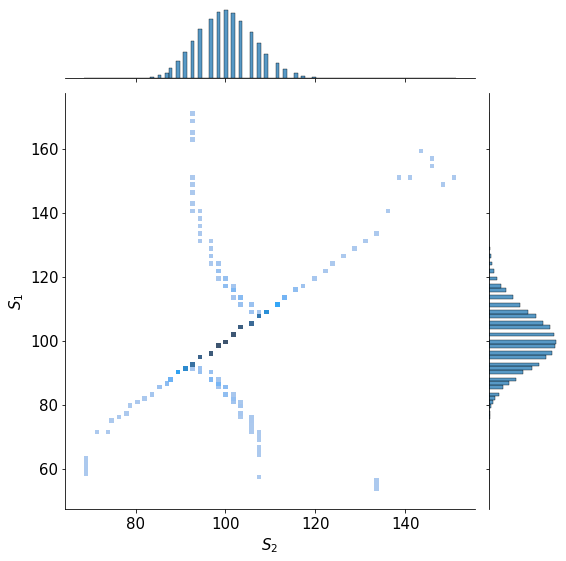

In [104]:
mot_inf.solution_object.draw_slice(0)
plt.savefig(os.path.join(path, 'discrete_2_inf.png'), dpi=300)

In [105]:
print(mot_sup.model.obj_val, mot_inf.model.obj_val)

1.571983802892677 0.574511202325499


In [97]:
# n =100 -> 6.768039845540382 5.694280587662192
# n =1000 -> 6.772804520574041 5.643967968517473

In [77]:
def array_to_bmatrix(array, format_='%.3f'):
    begin = '\\begin{bmatrix} \n'
    data = ''
    for line in array:        
        if line.size == 1:
            data = data + ' '+ format_ +' &'%line
            data = data + r' \\'
            data = data + '\n'
            continue
        for element in line:
            data = data + ' %.3f &'%element

        data = data + r' \\'
        data = data + '\n'
    end = '\end{bmatrix}'
    print (begin + data + end)



In [ ]:
axis = 0
np.allclose(mot_inf.solution_object.coupling.sum(axis=axis),  mot_sup.solution_object.coupling.sum(axis=axis))
mot_inf.solution_object.coupling.sum(axis=axis)

In [ ]:
array_to_bmatrix(mot_inf.solution_object.coupling)

In [ ]:
import os 
from fractions import Fraction
# from pymatgen.symmetry.analyzer import SpacegroupAnalyzer
# from pymatgen.core import Lattice, Structure, Molecule, IStructure

def mat_to_fractions(mat):
#     s=IStructure.from_file(os.path.expanduser('~') + '/pymatgen-gap-affine_matrix/EntryWithCollCode136212.cif')
    a = SpacegroupAnalyzer(mat, 0.1)
    SymOp=a.get_symmetry_operations()
    b=SymOp[1].affine_matrix.tolist()

    lst=[]
    for i in range(len(b)):
        lst.append([]) 
        for j in range(len(b[i])):
            print(Fraction(str(b[i][j])),end=',')
            lst[i].append(Fraction(str(b[i][j])))
            
    return lst
